In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\A393350\Desklocalhost:8888/notebooks/Desktop/Kaggle/AceaSmartWaterAnalytics/notebookDada.ipynbtop\Kaggle\AceaSmartWaterAnalytics\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [86]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [87]:
df = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Aquifer_Petrignano.csv")
#df.head()
df = df[["Date","Depth_to_Groundwater_P25"]]
df.head()

,Date,Depth_to_Groundwater_P25
0,14/03/2006,-22.18
1,15/03/2006,-22.14
2,16/03/2006,-22.04
3,17/03/2006,-22.04
4,18/03/2006,-22.04


In [88]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head()

,Date,Depth_to_Groundwater_P25
0,2006-03-14,-22.18
1,2006-03-15,-22.14
2,2006-03-16,-22.04
3,2006-03-17,-22.04
4,2006-03-18,-22.04


In [89]:
print('The earliest date: \t%s' %df['Date'].values[[0, -1]][0])
print('The latest date: \t%s' %df['Date'].values[[0, -1]][1])
print(df.shape)

The earliest date: 	2006-03-14T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(5223, 2)


In [90]:
feature_col=list(df.columns[1:])
feature_col

['Depth_to_Groundwater_P25']

# 1. Data Visualization

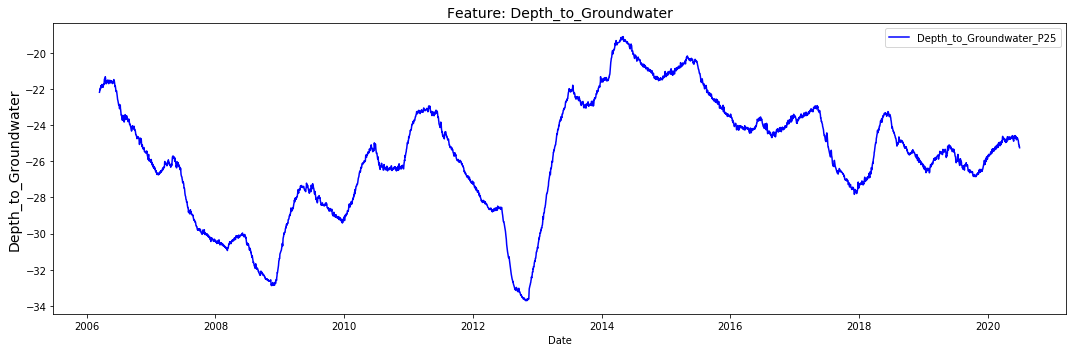

In [91]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
    
sns.lineplot(x=df['Date'].where(df['Depth_to_Groundwater_P25'].notnull()), y=df['Depth_to_Groundwater_P25'].fillna(np.inf), ax=ax, color='blue',label='Depth_to_Groundwater_P25')
ax.set_title('Feature: {}'.format('Depth_to_Groundwater'), fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

plt.tight_layout()
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5223 non-null   datetime64[ns]
 1   Depth_to_Groundwater_P25  5184 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.7 KB


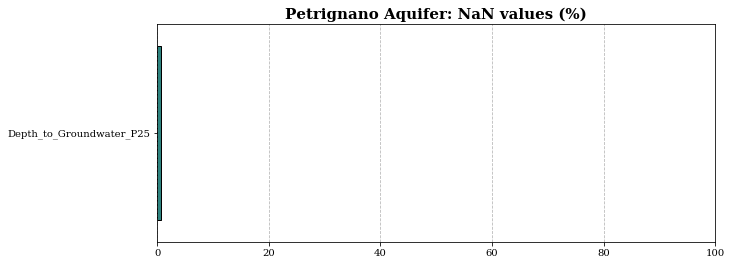

In [93]:
#Check missing values
NaN_values = (df[feature_col].isnull().sum() / len(df) * 100).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (10, 4))
plt.title('Petrignano Aquifer: NaN values (%)', size = 15, fontweight = 'bold', fontfamily = 'serif')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
sns.barplot(x = NaN_values, y = NaN_values.index, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(NaN_values.index))))
ax.set_xlim((0, 100))    
ax.set_xticklabels(range(0, 101, 20), fontfamily = 'serif')
ax.set_yticklabels(NaN_values.index, fontfamily = 'serif')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.9)
plt.show()


In [94]:
print('The earliest date: \t%s' %df['Date'].values[0])
print('The latest date: \t%s' %df['Date'].values[-1])
print(df.shape)

The earliest date: 	2006-03-14T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(5223, 2)


In [95]:
df = df.sort_values(by='Date')

df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2006-03-14,NaT
1,2006-03-15,1 days
2,2006-03-16,1 days
3,2006-03-17,1 days
4,2006-03-18,1 days


In [96]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

1 days    5222
Name: Time_Interval, dtype: int64


In [97]:
df.isna().sum()

Date                         0
Depth_to_Groundwater_P25    39
dtype: int64

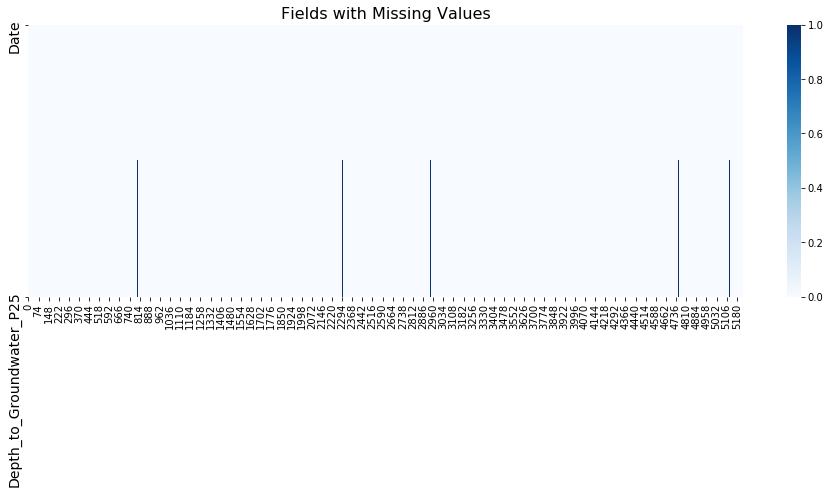

In [98]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
# for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Interpolate missing values

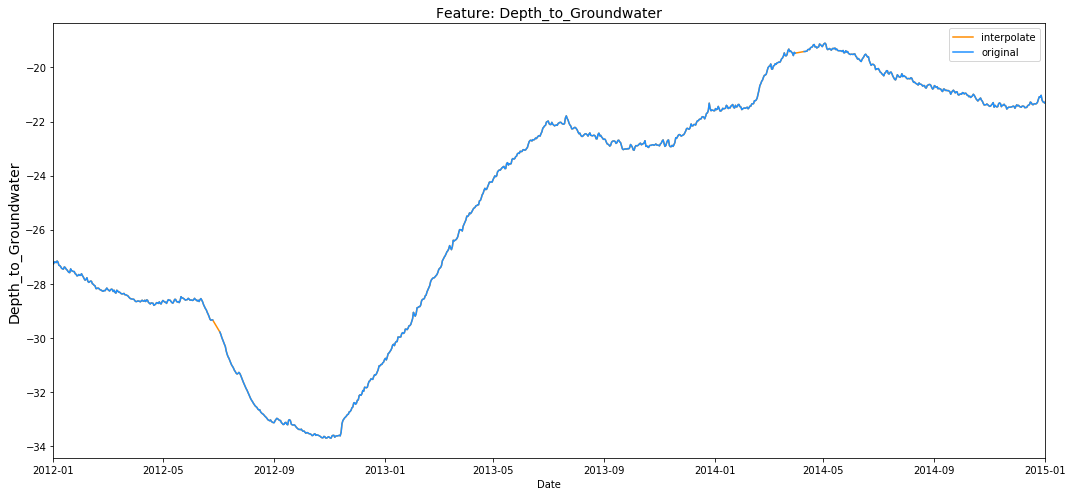

In [99]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.interpolate(), ax=ax, color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.fillna(np.inf), ax=ax, color='dodgerblue', label = 'original')
ax.set_title(f'Feature: Depth_to_Groundwater', fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
ax.set_xlim([date(2012, 1, 1), date(2015, 1, 1)])
# ax[2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [100]:
df = df.rename(columns={"Depth_to_Groundwater_P25":"Depth_to_Groundwater"})
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5223 entries, 0 to 5222
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5223 non-null   datetime64[ns]
 1   Depth_to_Groundwater  5223 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 251.5 KB


In [101]:
#df_downsampled = df[['Date',
#                     'Depth_to_Groundwater'
#                    ]].resample('7D', on='Date').mean().reset_index(drop=False)
#
#df = df_downsampled

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['Depth_to_Groundwater']

for column in core_columns:
    decomp = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq') # .set_index('Date')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [103]:
df.head()

,Date,Depth_to_Groundwater,Depth_to_Groundwater_trend,Depth_to_Groundwater_seasonal
0,2006-03-14,-22.18,-21.634506,0.005247
1,2006-03-15,-22.14,-21.634578,0.000757
2,2006-03-16,-22.04,-21.634649,0.008875
3,2006-03-17,-22.04,-21.634721,0.011070
4,2006-03-18,-22.04,-21.634793,0.003161


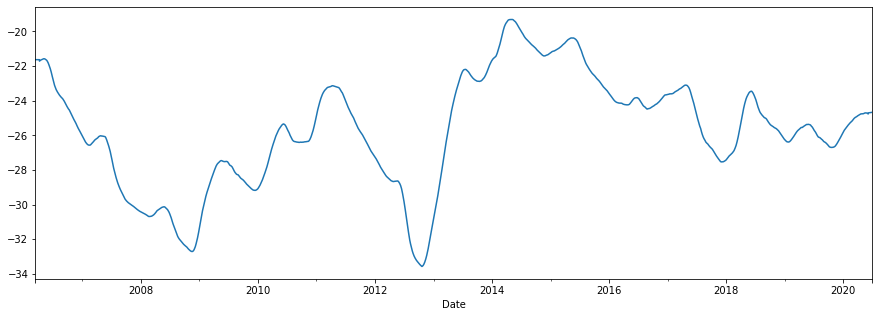

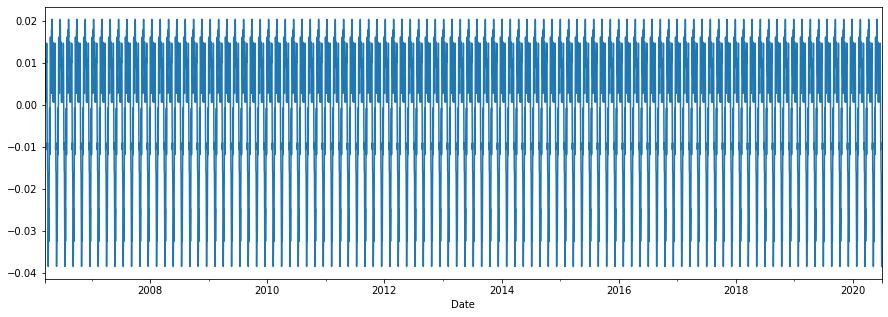

In [104]:
df.set_index("Date")["Depth_to_Groundwater_trend"].plot(figsize=(15,5))
plt.show()

df.set_index("Date")["Depth_to_Groundwater_seasonal"].plot(figsize=(15,5))
plt.show()

In [181]:

#from prophet import Prophet
#
##prepare input data for model
##The input to Prophet is always a dataframe with two columns: ds and y. 
#
#feature_columns = [
#    'Rainfall',
#    'Temperature',
#    'Drainage_Volume',
#    'River_Hydrometry',
#]
#target_column = ['Depth_to_Groundwater']
#
#train_size = int(0.85 * len(df))
#
#pro_df = df[['Date'] + target_column + feature_columns].copy()
#pro_df.columns = ['ds', 'y'] + feature_columns
#
#train = pro_df.iloc[:train_size, :]
#train.head()


In [182]:
#
#x_train, y_train = pd.DataFrame(pro_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[:train_size, 1])
#x_test, y_test = pd.DataFrame(pro_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[train_size:, 1])

In [183]:
#
## Train the model
#model = Prophet()
#model.add_regressor('Rainfall')
#model.add_regressor('Temperature')
#model.add_regressor('Drainage_Volume')
#model.add_regressor('River_Hydrometry')
#
#model.fit(train)
#
## x_valid = model.make_future_dataframe(periods=test_size, freq='w')
#
## Predict on test set
#y_pred = model.predict(x_test)
#
## Calcuate metrics
#score_mae = mean_absolute_error(y_test, y_pred['yhat'])
#score_rmse = math.sqrt(mean_squared_error(y_test, y_pred['yhat']))
#
#print('MAE: {}'.format(score_mae))
#print('RMSE: {}'.format(score_rmse))

In [105]:
#
## Plot the forecast
#f, ax = plt.subplots(1, figsize=(8,4))
#
#model.plot(y_pred, ax=ax)
#sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Ground truth') 
#sns.lineplot(x=x_train['ds'], y=y_train['y'], ax=ax, color='black', label='Train') 
#
#ax.set_title(f'Prophet Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Date', fontsize=14)
#ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
#
#plt.show()

 # Baseline model 

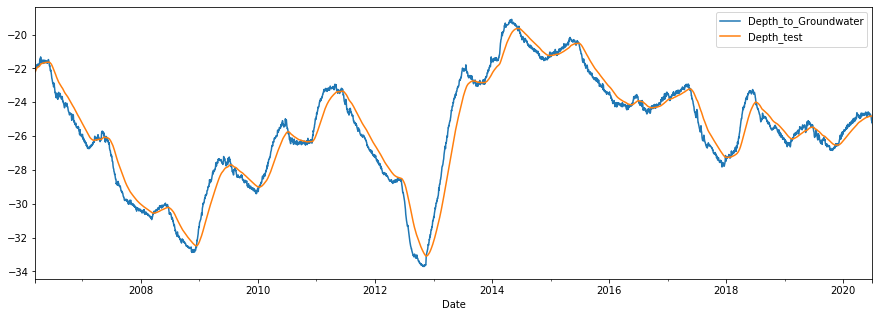

In [136]:
#df["Depth_to_Groundwater"].ewm(span=200).mean()
df["Depth_test"] = df["Depth_to_Groundwater"].ewm(span=90).mean()

df.set_index("Date")[["Depth_to_Groundwater","Depth_test"]].plot(figsize=(15,5))

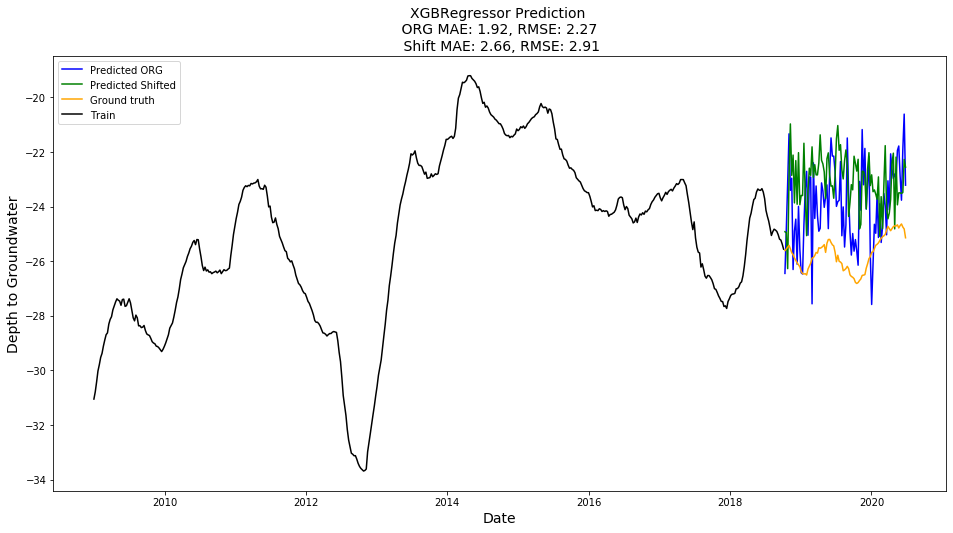

In [191]:
# Plot the forecast
f, ax = plt.subplots(1, figsize=(16,8))

sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_org_pred, ax=ax, color='blue', label='Predicted ORG') 
sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_shift_pred, ax=ax, color='green', label='Predicted Shifted') 

sns.lineplot(x=df['Date'].iloc[int(train_size*len(df)):], y=y_org_test, ax=ax, color='orange', label='Ground truth') 
sns.lineplot(x=df['Date'].iloc[:int(train_size*len(df))], y=y_org_train, ax=ax, color='black', label='Train') 

ax.set_title(f'XGBRegressor Prediction \n ORG MAE: {score_mae_org:.2f}, RMSE: {score_rmse_org:.2f} \n Shift MAE: {score_mae_shift:.2f}, RMSE: {score_rmse_shift:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

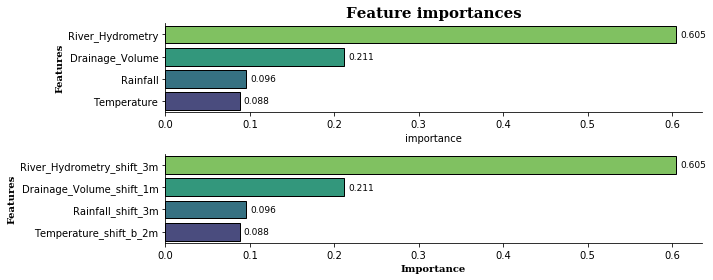

In [192]:
bias = 0.02
imp_org = pd.DataFrame({'importance': model_org.feature_importances_,
                'features': x_org_train.columns}).sort_values('importance',ascending = False)
imp_shift = pd.DataFrame({'importance': model_shift.feature_importances_,
                'features': x_shift_train.columns}).sort_values('importance',ascending = False)

fig, ax = plt.subplots(nrows=2, ncols=1,figsize = (10, 4))
ax[0].set_title('Feature importances', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.barplot(x = imp_org.importance, y = imp_org.features, edgecolor = 'black',
        palette = reversed(sns.color_palette("viridis", len(imp_org.features))),ax=ax[0])

for i in ['top', 'right']:
    ax[0].spines[i].set_visible(None)

rects = ax[0].patches
labels = imp_org.importance
for rect, label in zip(rects, labels):
    x_value = rect.get_width() + bias
    y_value = rect.get_y() + rect.get_height() / 2
    ax[0].text(x_value, y_value, round(label, 3), fontsize = 9, color = 'black',
             ha = 'center', va = 'center')
ax[0].set_ylabel('Features', fontweight = 'bold', fontfamily = 'serif')


sns.barplot(x = imp_shift.importance, y = imp_shift.features, edgecolor = 'black',
        palette = reversed(sns.color_palette("viridis", len(imp_org.features))),ax=ax[1])

for i in ['top', 'right']:
    ax[1].spines[i].set_visible(None)

rects = ax[1].patches
labels = imp_shift.importance
for rect, label in zip(rects, labels):
    x_value = rect.get_width() + bias
    y_value = rect.get_y() + rect.get_height() / 2
    ax[1].text(x_value, y_value, round(label, 3), fontsize = 9, color = 'black',
             ha = 'center', va = 'center')
ax[1].set_ylabel('Features', fontweight = 'bold', fontfamily = 'serif')
ax[1].set_xlabel('Importance', fontweight = 'bold', fontfamily = 'serif')

plt.tight_layout()
plt.show()


# LSTM

In [193]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler

In [194]:
data = df.filter(['Temperature','Drainage_Volume','Rainfall','River_Hydrometry','Depth_to_Groundwater'])
print(data.columns)
# data = df.filter(['Depth_to_Groundwater'])
#Convert the dataframe to a numpy array
dataset = data.values.astype('float32')

Index(['Temperature', 'Drainage_Volume', 'Rainfall', 'River_Hydrometry',
       'Depth_to_Groundwater'],
      dtype='object')


In [195]:
# Defines the rolling window
look_back = 30
train_size=int(0.7*len(dataset))
val_size=int(0.85*len(dataset))

# Split into train and test sets
train, val, test = dataset[:train_size-look_back,:],dataset[train_size-look_back:val_size-look_back,:],dataset[val_size-look_back:,:]
# print(train.shape,val.shape,test.shape)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, :]
        X.append(a)
        Y.append(dataset[i, -1])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

# scaler = StandardScaler()
# transformer = scaler.fit_transform(df)
scaler = MinMaxScaler(feature_range=(-1, 0))

x_train_scaled = scaler.fit_transform(np.reshape(x_train,(360,look_back*5)))
x_val_scaled = scaler.fit_transform(np.reshape(x_val,(60,look_back*5)))
x_test_scaled = scaler.fit_transform(np.reshape(x_test,(90,look_back*5)))

x_train_scaled = np.reshape(x_train_scaled,(360,look_back,5))
x_val_scaled = np.reshape(x_val_scaled,(60,look_back,5))
x_test_scaled = np.reshape(x_test_scaled,(90,look_back,5))

# input x has 3D structure [samples, time steps, features]
print(x_train_scaled.shape,y_train.shape,x_val_scaled.shape,y_val.shape,x_test_scaled.shape,y_test.shape)

(360, 30, 5) (360,) (60, 30, 5) (60,) (90, 30, 5) (90,)
(360, 30, 5) (360,) (60, 30, 5) (60,) (90, 30, 5) (90,)


In [196]:
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = scaler.fit_transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = scaler.fit_transform(y_test.reshape(-1, 1)).flatten()

In [197]:
x_train.shape[2]

5

In [198]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import callbacks

#Build the LSTM model
model = Sequential()
#input_sahep=(time steps, features)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
# early_stopping = callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
history = model.fit(x_train_scaled, y_train_scaled, batch_size=8, epochs=30, validation_data=(x_val_scaled, y_val_scaled), verbose=2, shuffle=False)
#                  callbacks=[early_stopping])

model.summary()

Train on 360 samples, validate on 60 samples
Epoch 1/30
360/360 - 1s - loss: 0.0949 - val_loss: 0.2837 - 1s/epoch - 4ms/sample
Epoch 2/30
360/360 - 1s - loss: 0.0636 - val_loss: 0.2021 - 742ms/epoch - 2ms/sample
Epoch 3/30
360/360 - 1s - loss: 0.0417 - val_loss: 0.1937 - 726ms/epoch - 2ms/sample
Epoch 4/30
360/360 - 1s - loss: 0.0351 - val_loss: 0.1698 - 711ms/epoch - 2ms/sample
Epoch 5/30
360/360 - 1s - loss: 0.0331 - val_loss: 0.1354 - 711ms/epoch - 2ms/sample
Epoch 6/30
360/360 - 1s - loss: 0.0189 - val_loss: 0.0973 - 709ms/epoch - 2ms/sample
Epoch 7/30
360/360 - 1s - loss: 0.0125 - val_loss: 0.0727 - 639ms/epoch - 2ms/sample
Epoch 8/30
360/360 - 1s - loss: 0.0087 - val_loss: 0.0692 - 736ms/epoch - 2ms/sample
Epoch 9/30
360/360 - 1s - loss: 0.0083 - val_loss: 0.0603 - 784ms/epoch - 2ms/sample
Epoch 10/30
360/360 - 1s - loss: 0.0072 - val_loss: 0.0507 - 788ms/epoch - 2ms/sample
Epoch 11/30
360/360 - 1s - loss: 0.0058 - val_loss: 0.0465 - 765ms/epoch - 2ms/sample
Epoch 12/30
360/360 -

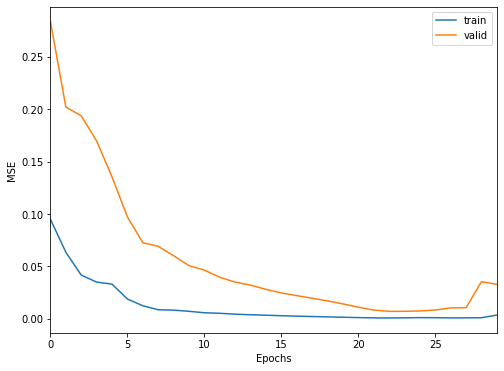

In [199]:
# plot history
f, ax = plt.subplots(1,figsize = (8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlim([0,29])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [200]:
## predict with the model
print(x_test_scaled.shape)
test_predict = model.predict(x_test_scaled)

(90, 30, 5)


In [201]:
inv_test_predict = scaler.inverse_transform(test_predict)[:,0]
inv_test_predict.shape

(90,)

In [202]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, inv_test_predict))
mae = mean_absolute_error(y_test, inv_test_predict)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.372
Test MAE: 0.301


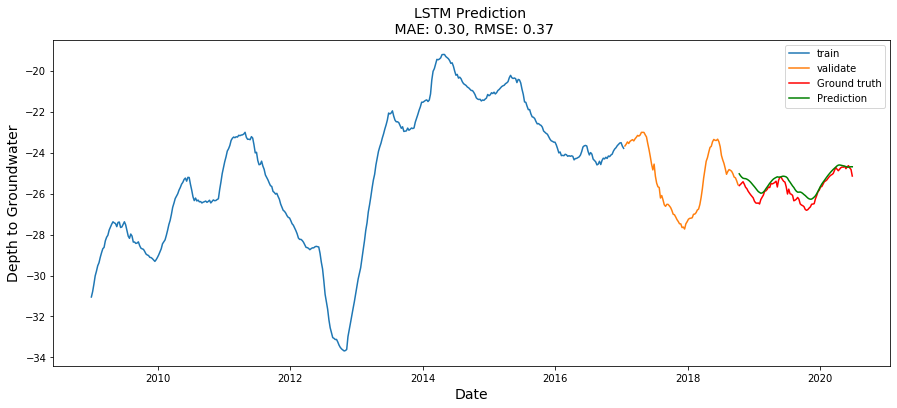

In [207]:
x_train_ticks = df['Date'].iloc[:train_size]
y_train = df['Depth_to_Groundwater'].iloc[:train_size]
x_val_ticks = df['Date'].iloc[train_size:val_size]
y_val = df['Depth_to_Groundwater'].iloc[train_size:val_size]
x_test_ticks = df['Date'].iloc[val_size:]
y_test = df['Depth_to_Groundwater'].iloc[val_size:]


# Plot the forecast
f, ax = plt.subplots(1,figsize=(15,6))

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='train') #navajowhite
sns.lineplot(x=x_val_ticks, y=y_val, ax=ax, label='validate') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test, ax=ax, color='red', label='Ground truth') #navajowhite
sns.lineplot(x=x_test_ticks, y=inv_test_predict, ax=ax, color='green', label='Prediction') #navajowhite

ax.set_title(f'LSTM Prediction \n MAE: {mae:.2f}, RMSE: {rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()


In [209]:
import shap
print(shap.__version__)

0.40.0


In [210]:
explainer = shap.DeepExplainer(model, x_train_scaled)
shap_values = explainer.shap_values(x_test_scaled)


In [211]:
# init the JS visualization code
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:][:][:-1].sum(axis=1), ['Temperature','Drainage_Volume','Rainfall','River_Hydrometry'])